# BDA Holiday Assignment - 2211CS020514

1. How can you use Python to handle imbalanced datasets for classification tasks?


Imbalanced datasets can be handled by:
Resampling: Oversampling the minority class (e.g., using SMOTE) or undersampling the majority class.
Using algorithms that handle imbalanced data (e.g., XGBoost with scale_pos_weight).
Adjusting class weights in algorithms.

In [5]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/resbaz/r-novice-gapminder-files/master/data/gapminder-FiveYearData.csv")
print(df.columns)

Index(['country', 'year', 'pop', 'continent', 'lifeExp', 'gdpPercap'], dtype='object')


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/resbaz/r-novice-gapminder-files/master/data/gapminder-FiveYearData.csv")

# Check dataset columns
print(df.columns)  # Verify column names

# Example: Predicting 'continent' using other features
X = df.drop(['continent', 'country'], axis=1)  # Drop target and irrelevant columns
y = df['continent']  # Target column

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Oversample the minority class
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Train the model
clf = RandomForestClassifier()
clf.fit(X_train_res, y_train_res)

# Evaluate the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

Index(['country', 'year', 'pop', 'continent', 'lifeExp', 'gdpPercap'], dtype='object')
              precision    recall  f1-score   support

      Africa       0.89      0.83      0.86       201
    Americas       0.65      0.75      0.69        91
        Asia       0.64      0.61      0.62        98
      Europe       0.84      0.80      0.82       115
     Oceania       0.44      1.00      0.61         7

    accuracy                           0.77       512
   macro avg       0.69      0.80      0.72       512
weighted avg       0.78      0.77      0.77       512



2. How do you choose the optimal number of clusters for K-means in Python?


The Elbow Method and Silhouette Score are common techniques.

C:\Users\91917\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91917\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\91917\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91917\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

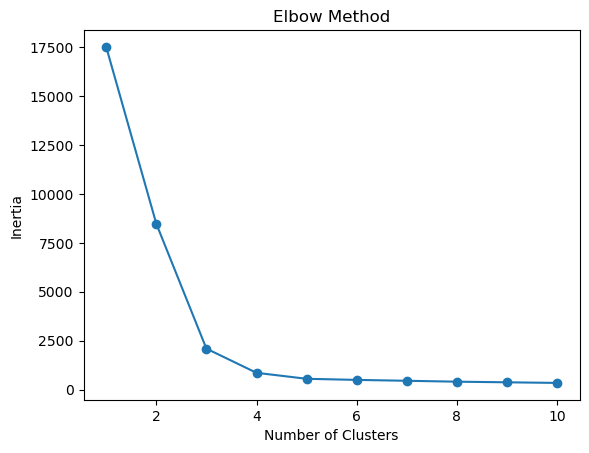

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate or load dataset
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=300, centers=5, random_state=42)

# Calculate inertia for different k values
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    inertia.append(kmeans.inertia_)

# Plot
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

3. What techniques can you use to reduce dimensionality for large datasets (e.g., PCA)?



Dimensionality reduction techniques include:

Principal Component Analysis (PCA).
t-SNE for visualization.


In [8]:
from sklearn.decomposition import PCA
import pandas as pd

# Load dataset
df = pd.read_csv("https://people.sc.fsu.edu/~jburkardt/data/csv/hw_200.csv")
X = df.iloc[:, :-1]

# Apply PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")

Explained Variance Ratio: [0.99888736 0.00111264]


4. How do you use Python to find and visualize correlations in a big dataset?


Use a correlation matrix and a heatmap:

C:\Users\91917\AppData\Local\Temp\ipykernel_21996\3540373555.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


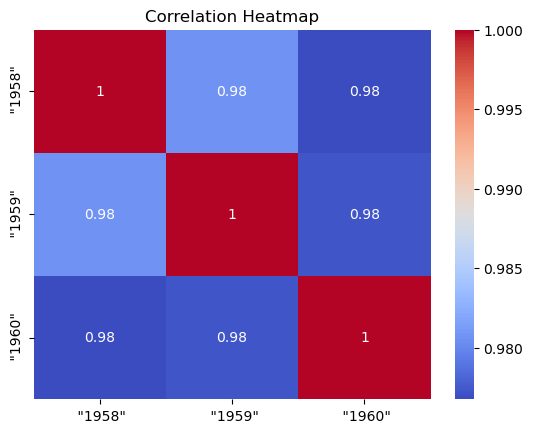

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("https://people.sc.fsu.edu/~jburkardt/data/csv/airtravel.csv")

# Compute correlation
corr_matrix = df.corr()

# Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

5. How can you handle missing values in a dataset using Python?


Techniques include:

Dropping rows/columns with missing values.
Imputing values (mean, median, mode).
Using predictive models.

In [10]:
df.fillna(df.mean(), inplace=True)  

C:\Users\91917\AppData\Local\Temp\ipykernel_21996\2667358281.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


6. How can you detect and remove duplicate entries in a big dataset?

In [11]:
df = df.drop_duplicates()

7. How can you implement and tune a Random Forest Regression model for housing price prediction?

In [13]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")

# Inspect the dataset
print(df.head())

# Split the data
X = df.drop("medv", axis=1)  # Drop the target column
y = df["medv"]  # Target column: Median value of owner-occupied homes

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
Mean Squared Error: 9.619662013157892


8. Plot the histogram, bar chart, and pie chart on a sample dataset.

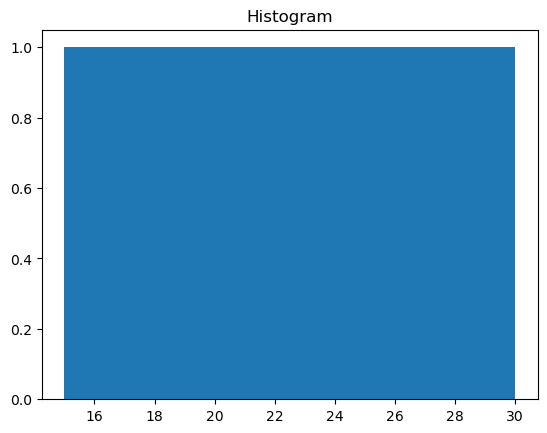

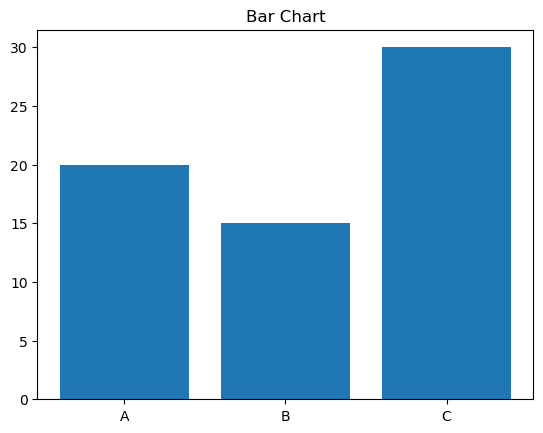

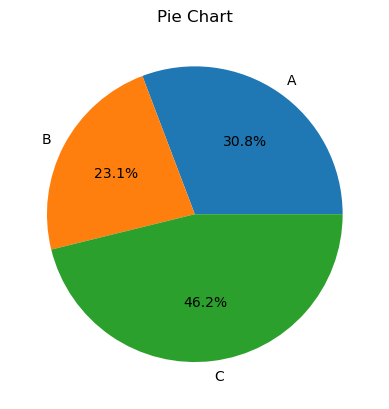

In [15]:
import matplotlib.pyplot as plt

# Sample data
data = {'Category': ['A', 'B', 'C'], 'Values': [20, 15, 30]}

# Histogram
plt.hist(data['Values'], bins=3)
plt.title('Histogram')
plt.show()

# Bar Chart
plt.bar(data['Category'], data['Values'])
plt.title('Bar Chart')
plt.show()

# Pie Chart
plt.pie(data['Values'], labels=data['Category'], autopct='%1.1f%%')
plt.title('Pie Chart')
plt.show()

9. Implement Linear and Logistic Regression on a sample dataset.

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = [[1], [2], [3]]
y = [2, 4, 6]

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(f"R2 Score: {r2_score(y, y_pred)}")

R2 Score: 1.0


10. How do you use Python to create lag features for time-series datasets?

In [18]:
print(df.columns)

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


In [19]:
df['Lag_1'] = df['medv'].shift(1)
df['Lag_2'] = df['medv'].shift(2)

In [20]:
import pandas as pd

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")

# Inspect columns
print(df.columns)

# Create lag features (adjust column name based on the actual dataset)
df['Lag_1'] = df['medv'].shift(1)  # Example with 'medv' column
df['Lag_2'] = df['medv'].shift(2)

# Show the dataset with lag features
print(df.head())

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  Lag_1  Lag_2  
0  396.90   4.98  24.0    NaN    NaN  
1  396.90   9.14  21.6   24.0    NaN  
2  392.83   4.03  34.7   21.6   24.0  
3  394.63   2.94  33.4   34.7   21.6  
4  396.90   5.33  36.2   33.4   34.7  
